<a href="https://colab.research.google.com/github/siddharthc30/Image_Classification/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"siddharthcilamkoti","key":"427941658dea6cf05a1348049dcc0461"}'}

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c dogs-vs-cats

 99% 269M/271M [00:04<00:00, 32.5MB/s]
100% 271M/271M [00:04<00:00, 64.2MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 75.0MB/s]
 99% 539M/543M [00:05<00:00, 118MB/s]
100% 543M/543M [00:05<00:00, 98.5MB/s]


In [0]:
from zipfile import ZipFile
with ZipFile('train.zip','r') as zip:
  zip.extractall()

with ZipFile('test1.zip','r') as zip:
  zip.extractall()  

In [7]:
! pip install keras

In [0]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Activation,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

In [0]:
Train_Dir='./train'
Test_Dir='./test1'

IMG=os.listdir(Train_Dir)

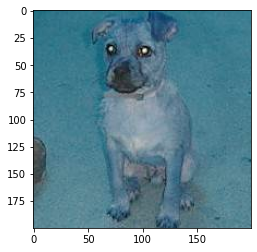

In [10]:
 for img in os.listdir(Train_Dir):
  img_array=cv2.imread(os.path.join(Train_Dir,img))
  plt.imshow(img_array)
  plt.show()
  break

In [11]:
print(img_array.shape)

(200, 200, 3)


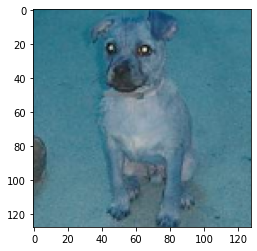

In [12]:
img_size=128
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array)

In [0]:
training_data=[]

def create_trainingdata():
    for img in IMG:
      try:
        category=img.split('.')[0]
        if category == 'dog':
          label=1
        else:
          label=0  
        img_array =cv2.imread(os.path.join(Train_Dir,img),cv2.IMREAD_GRAYSCALE)
        new_array =cv2.resize(img_array,(img_size,img_size))
        ##plt.imshow(new_array)
        ##plt.show()
        ##print(label)
        ##by running the above commented line we can check the labelling
        training_data.append([new_array,label])
      except Exception as e:
        pass

create_trainingdata()  

In [34]:
print(len(training_data))   

25000


In [0]:
import random 
random.shuffle(training_data)

In [0]:
X=[]
Y=[]
from keras.optimizers import RMSprop
for features, label in training_data:
  X.append(features)
  Y.append(label)

X=np.array(X).reshape(-1,img_size,img_size,1)

In [39]:
X.shape

(25000, 128, 128, 1)

In [0]:
datagen = ImageDataGenerator(
        rescale=1.0/255.0,   
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=10, 
        zoom_range = 0.1,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X)

In [0]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=np.random)

In [0]:
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(128, 128, 1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (1,1), activation='relu'))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 128)     

In [59]:
history=model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest), epochs=50, batch_size=32)

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 10s 478us/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 2/50
20000/20000 [==============================] - 10s 477us/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 3/50
20000/20000 [==============================] - 10s 478us/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 4/50
20000/20000 [==============================] - 10s 477us/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 5/50
20000/20000 [==============================] - 10s 477us/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 6/50
20000/20000 [==============================] - 10s 476us/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 7/50
20000/20000 [==============================] -